In [1]:
# importation
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.myfunc import MyMatmul
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.posttreat import Export_hyper

### Parametres - experimental conditions

In [2]:
exp1 = FBRestNet(experimentation=Physics(2000,50,0.5,1), constraint = 'cube',\
                 nb_blocks=20, noise = 0.01,\
                 folder = './', im_set="Set1",batch_size=[600,1],\
                 lr=1e-3, nb_epochs=[30,1])

### Synthetic dataset

In [3]:
train_set, val_set = exp1.CreateDataSet()

### Training

epoch :  0  -----  validation :  5.050383669844103e-06
epoch :  1  -----  validation :  4.876834693229499e-06
epoch :  2  -----  validation :  4.7229536355175625e-06
epoch :  3  -----  validation :  4.5899812739982514e-06
epoch :  4  -----  validation :  4.472133701681138e-06
epoch :  5  -----  validation :  4.382911565893271e-06
epoch :  6  -----  validation :  4.31668492390042e-06
epoch :  7  -----  validation :  4.264149185300125e-06
epoch :  8  -----  validation :  4.218714389425894e-06
epoch :  9  -----  validation :  4.1864452486147436e-06
epoch :  10  -----  validation :  4.161355687829566e-06
epoch :  11  -----  validation :  4.1394458916233335e-06
epoch :  12  -----  validation :  4.12411362908391e-06
epoch :  13  -----  validation :  4.1130388600646966e-06
epoch :  14  -----  validation :  4.104106668037915e-06
epoch :  15  -----  validation :  4.095196711785494e-06
epoch :  16  -----  validation :  4.087884488355722e-06
epoch :  17  -----  validation :  4.08266628935496e-06


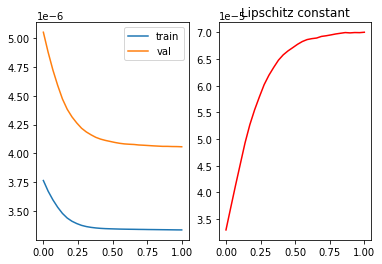

Final Lipschitz constant =  7.003308320748601e-05


In [4]:
exp1.train(train_set,val_set,save_model=True)

### Gaussian test

torch.Size([1, 1, 50])
torch.Size([1, 1, 50])
torch.Size([1, 1, 50])
(2000,)
x/xb = 0.34138355560750877


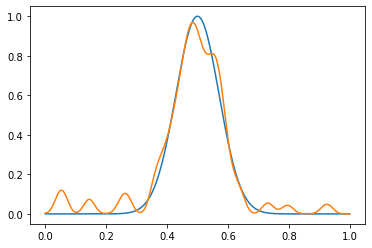

In [8]:
exp1.test_gauss()

### Lipschitz constant

In [6]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

0.04916386896381571

In [7]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")

7.003020509955171e-05

In [9]:
def test_gauss(self):
        # Gaussienne 
        nx    = self.physics.nx
        m     = self.physics.m
        t     = np.linspace(0,1,nx)
        gauss = np.exp(-(t-0.5)**2/(0.1)**(2))
        if self.constr == 'cube':
            gauss = gauss/np.amax(gauss)
        if self.constr == 'slab':
            gauss = np.sqrt(nx)*gauss/np.linalg.norm(gauss)
        # export
        Export_Data(t,gauss,'./Redaction/data','gauss')
        #
        noise = 0.01*np.random.randn(nx)
        x_b   = self.physics.ComputeAdjoint(self.physics.Compute(gauss)+noise)
        # passage float tensor
        x_bias    = Variable(torch.FloatTensor(x_b.reshape(1,1,-1)),requires_grad=False)
        # definition of the initialisation tensor
        x_init   = torch.zeros(x_bias.shape)
        tTTinv   = MyMatmul(np.diag(self.physics.eigm**(2*self.physics.a)))
        print(x_init.shape)
        print(x_bias.shape)
        print(tTTinv(x_bias).shape)
        x_init[:,:,:30] = tTTinv(x_bias)[:,:,:30] # filtration of high frequences
        x_init   = Variable(x_init.reshape(1,1,-1),requires_grad=False)
        # prediction
        x_pred   = self.model(x_init,x_bias)
        xpc      = x_pred.detach().numpy()[0,0,:]
        xp       = self.physics.BasisChangeInv(xpc)
        print(t.shape)
        # export
        Export_Data(t,xp,'./Redaction/data','gauss_pred_a{}_'.format(self.physics.a)+self.constr)
        # plot
        plt.plot(t,gauss)
        plt.plot(t,xp)
        #
        print("x/xb =",np.linalg.norm(x_b)/(1/np.sqrt(nx)*np.linalg.norm(gauss)))

torch.Size([1, 1, 50])
torch.Size([1, 1, 50])
torch.Size([1, 1, 50])
(2000,)
x/xb = 0.3405111023307394


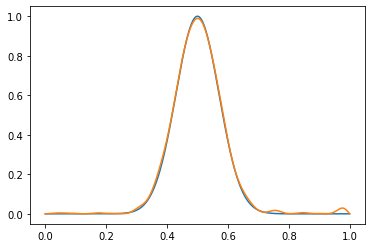

In [12]:
from FBResNet.posttreat import Export_Data
test_gauss(exp1)